### __Arrow of time in the flea universe:__ 
Two flea infested dogs are lying next to each other. The fleas hop
from one dog to the other. Each flea has a name. The dynamics of the fleas is determined by a flea God
who loves to play dice with this flea universe. It generates a random number, after a certain time step,
between $1$ and $N$ (where $N$ is the number of fleas). Depending on the number, It calls out the name of
the corresponding flea, which is compelled to jump from the current dog it is inhabiting to the other.
Starting with a given distribution of fleas, these ‘stochastic’ dynamics will evolve the microstate (a
precise description of which flea infests which dog) and the macrostate (how many fleas on a given
dog).

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from random import randrange
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
#entropy as function of Mactrostate
def entropy(nA, nB): #nA, nB number of flea on Dog A and B repectively 
    n = nA+nB #total number is constant
    omega = factorial(n)/(factorial(nA)*factorial(n-nA))
    return math.log(omega)
    
def factorial(n):
    return 1 if n==0 else n*factorial(n-1)    

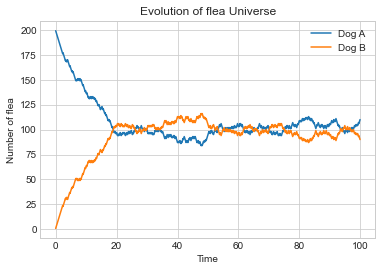

In [8]:
#list of flea

N = 200 #number of flea

flea = list(range(N))
dogA = list(range(N)) #initially all flee are on A
dogB = list() #dog B has no fly

macrostate = list()

time_step = 0.1
final_time = 100
time = np.arange(0,final_time, time_step)

#the event loop
for _ in time:
    
    chosen_flee = randrange(N) #randomly choose a fly
    if chosen_flee in dogA:
        idx = dogA.index(chosen_flee)
        dogB.append(dogA.pop(idx)) #removing from one list and adding into other
    else:
        idx = dogB.index(chosen_flee)
        dogA.append(dogB.pop(idx))
    
    macrostate.append((len(dogA), len(dogB)))

label = ['Dog A', 'Dog B']
plt.plot(time, macrostate, label=label)
plt.xlabel('Time')
plt.ylabel('Number of flea')
plt.title('Evolution of flea Universe')
plt.legend();

In [4]:
entropy_list = [entropy(i,j) for i,j in macrostate]

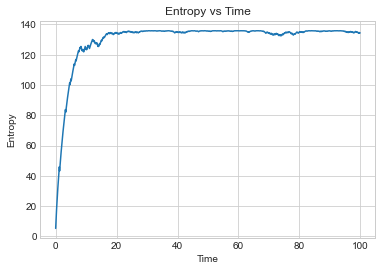

In [5]:
plt.plot(time, entropy_list)
plt.title('Entropy vs Time')
plt.ylabel('Entropy')
plt.xlabel('Time');

### Calculating the theoritical value of entropy

Entropy in derectly proporational to number of microstate in a macrostate. So we can say that:

$$S = k\log(\mathcal{N}_a)$$.

But how do we find the number of microstate in a perticular macrostate? let's take a macrostate that $r$ flee are on dog A and the rest are on dog B. So how many combinations are possible to choose from the given set of $N$ flee. Since all flee are identical we have the number as 

$$\mathcal{N}_a = \frac{n!}{r!(n-r)!}$$

So entropy would be:

$$S = k\log \left(\frac{n!}{r!(n-r)!} \right)$$

Equallibruim is achieved when the system in macrostate corresponding to maximum microstates. So the corresponding entropy would be also maximum with respect to macrostates. 

$$\frac{\partial S}{\partial r} = 0$$

Solving that analytical we find the condition for maximum entropy as: $r = n/2$

So the maximum entropy would be:

$$S = k\log \left(\frac{n!}{\frac{n}{2}!\frac{n}{2}!}\right)$$

In [6]:
S_th = math.log(factorial(N)/(factorial(int(N/2))*factorial(int(N/2)))) 
S_th

135.7532360812785

In [7]:
print(max(entropy_list))

135.7532360812785
